# Transformation of audio files to mel-spectrograms

In [54]:
import librosa
from librosa.feature import melspectrogram
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

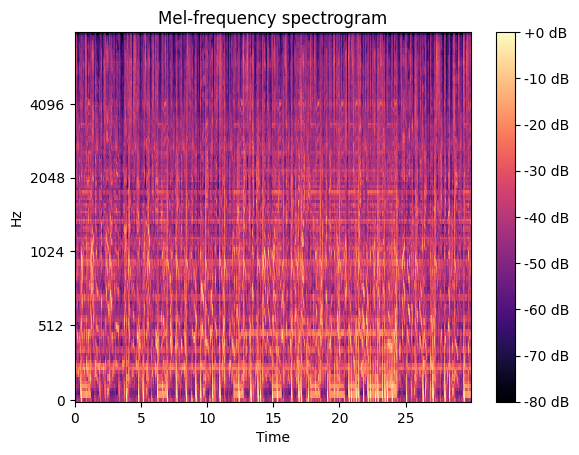

In [47]:
path = '../../datasets/fma/fma_small/Hip-Hop/000002.mp3'
y, sr = librosa.load(path)
spec = melspectrogram(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

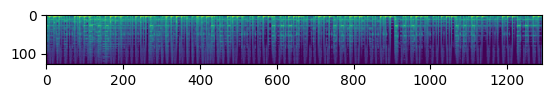

In [18]:
plt.imshow(S_dB)
plt.show()

In [27]:
S_dB.shape

(128, 1291)

In [3]:
plt.imsave('test.jpg', S_dB)

In [51]:
png = Image.open('test.png')
jpg = Image.open('test.jpg')

numpy_png = np.asarray(png)
numpy_jpg = np.asarray(jpg)

numpy_png = numpy_png[:,:,:3]

In [85]:
numpy_jpg[:,:1291].shape

(128, 1290, 3)

# Checking shape of audio files

In [79]:
from tqdm import tqdm


rootdir = '../../datasets/fma/fma_small/'

shapes = {}

total_files = sum([len(files) for r, d, files in os.walk(rootdir)])

with tqdm(total=total_files, desc="Processing files") as pbar:
    for subdir, dirs, folders in os.walk(rootdir):
        for folder in dirs:
            for subdir_, dirs, files in os.walk(os.path.join(rootdir, folder)):
                for file in files:
                    path = os.path.join(subdir_, file)
                    try:
                        y, sr = librosa.load(path)
                        spec = melspectrogram(y=y, sr=sr)
                        S_dB = librosa.power_to_db(spec, ref=np.max)
                        shapes[S_dB.shape[1]] = shapes.get(S_dB.shape[1], 0) + 1
                    except Exception as e:
                        print(f"Error processing {path}: {e}. Deleting the file.")
                        os.remove(path)
                    pbar.update(1)

Processing files:  45%|████▍     | 3571/8000 [04:26<05:28, 13.50it/s]C:\Users\szyme\AppData\Local\Temp\ipykernel_70252\185702050.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path)
Processing files:  45%|████▍     | 3576/8000 [04:26<03:58, 18.54it/s]

Error processing ../../datasets/fma/fma_small/Hip-Hop\098565.mp3: . Deleting the file.
Error processing ../../datasets/fma/fma_small/Hip-Hop\098567.mp3: . Deleting the file.
Error processing ../../datasets/fma/fma_small/Hip-Hop\098569.mp3: . Deleting the file.


Processing files:  95%|█████████▍| 7588/8000 [10:10<00:33, 12.37it/s]

Error processing ../../datasets/fma/fma_small/Rock\108925.mp3: . Deleting the file.


Processing files: 100%|█████████▉| 7998/8000 [10:45<00:00, 12.39it/s]


In [80]:
shapes

{1291: 4227, 1293: 3350, 1292: 417}

# Saving mel-spectrograms to `.png` and `.jpg`

In [87]:
rootdir = '../../datasets/fma/fma_small/'
output_dir = '../../datasets/fma/fma_small_spectrograms_png/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_mel_spectrogram(audio_path, output_path):
    try:
        y, sr = librosa.load(audio_path)
        spec = melspectrogram(y=y, sr=sr)
        S_dB = librosa.power_to_db(spec, ref=np.max)
        S_dB_resized = S_dB[:,:1291]

        plt.imsave(output_path, S_dB)
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

all_files = []
for subdir, dirs, _ in os.walk(rootdir):
    for genre_folder in dirs:
        genre_path = os.path.join(rootdir, genre_folder)
        for subdir_, _, files in os.walk(genre_path):
            for file in files:
                if file.endswith('.mp3'):
                    input_file_path = os.path.join(subdir_, file)
                    all_files.append((input_file_path, genre_folder))

with tqdm(total=len(all_files), desc="Processing all files") as pbar:
    for input_file_path, genre_folder in all_files:
        output_genre_folder = os.path.join(output_dir, genre_folder)
        if not os.path.exists(output_genre_folder):
            os.makedirs(output_genre_folder)
        
        output_file_path = os.path.join(output_genre_folder, os.path.basename(input_file_path).replace('.mp3', '.png'))
        
        save_mel_spectrogram(input_file_path, output_file_path)
        
        pbar.update(1)

Processing all files: 100%|██████████| 7994/7994 [20:52<00:00,  6.38it/s]


In [88]:
rootdir = '../../datasets/fma/fma_small/'
output_dir = '../../datasets/fma/fma_small_spectrograms_jpg/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_mel_spectrogram(audio_path, output_path):
    try:
        y, sr = librosa.load(audio_path)
        spec = melspectrogram(y=y, sr=sr)
        S_dB = librosa.power_to_db(spec, ref=np.max)
        S_dB_resized = S_dB[:,:1291]

        plt.imsave(output_path, S_dB)
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

all_files = []
for subdir, dirs, _ in os.walk(rootdir):
    for genre_folder in dirs:
        genre_path = os.path.join(rootdir, genre_folder)
        for subdir_, _, files in os.walk(genre_path):
            for file in files:
                if file.endswith('.mp3'):
                    input_file_path = os.path.join(subdir_, file)
                    all_files.append((input_file_path, genre_folder))

with tqdm(total=len(all_files), desc="Processing all files") as pbar:
    for input_file_path, genre_folder in all_files:
        output_genre_folder = os.path.join(output_dir, genre_folder)
        if not os.path.exists(output_genre_folder):
            os.makedirs(output_genre_folder)
        
        output_file_path = os.path.join(output_genre_folder, os.path.basename(input_file_path).replace('.mp3', '.jpg'))
        
        save_mel_spectrogram(input_file_path, output_file_path)
        
        pbar.update(1)

Processing all files: 100%|██████████| 7994/7994 [10:37<00:00, 12.54it/s]
